In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('StudentPerformance.csv')
display(df.head())
np.shape(df)
print(df.isnull().sum()) #no emty columns according to results
print(df.duplicated().sum())  #answer is 127,so we will drop the duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())  #now,its zero

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
127
0


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7               99                        Yes            9   
1               4               82                         No            4   
2               8               51                        Yes            7   
3               5               52                        Yes            5   
4               7               75                         No            8   
5               3               78                         No            9   
6               7               73                        Yes            5   
7               8               45                        Yes            4   
8               5               77                         No            8   
9               4               89                         No            4   
10              8               91                         No            4   
11              8               79                         No   

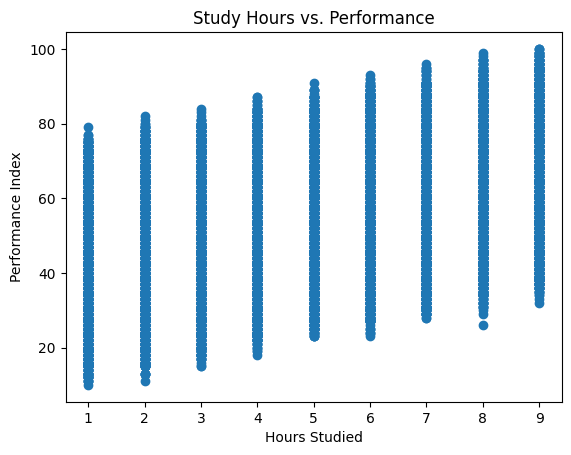

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Start with your cleaned data (duplicates already removed)
# Create a copy so you keep a 'clean' version and a 'model-ready' version
df_model = df.copy()

# 2. Define your mapping
mapping = {'Yes': 1, 'No': 0}
df_model['Extracurricular Activities'] = df_model['Extracurricular Activities'].map(mapping)

display(df_model.head())
#display(df_model.dtypes)

plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Study Hours vs. Performance')
#plt.show()
numeric_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Performance Index"
]
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col + "_outlier"] = ((df[col] < lower) | (df[col] > upper)).astype(int)

print(df.head(20))


In [21]:
outlier_cols = [col for col in df.columns if '_outlier' in col]
df['any_outlier'] = df[outlier_cols].any(axis=1).astype(int)

# Filter for rows where any outlier is flagged (value is 1)
outlier_rows = df[df['any_outlier'] == 1]

# Sort the data by 'Performance Index' to see how outliers relate to performance
outlier_rows_sorted = outlier_rows.sort_values(by='Performance Index')

display(outlier_rows_sorted.head())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Hours Studied_outlier,Previous Scores_outlier,Sleep Hours_outlier,Sample Question Papers Practiced_outlier,Performance Index_outlier,any_outlier


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=df_model[['Hours Studied']]
y=df_model['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
print("Model training complete!")

Model training complete!


In [23]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r_square=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-squared:",r_square)

Mean Squared Error: 321.6814616639547
R-squared: 0.13564765110344068


In [24]:
#as r_squared is very low,lets add multiple linear regression
features = ['Hours Studied', 'Sample Question Papers Practiced','Previous Scores']
X = df_model[features]
y = df_model['Performance Index']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_multi = multi_model.predict(X_test)
new_r2 = r2_score(y_test, y_pred_multi)
new_mse = mean_squared_error(y_test, y_pred_multi)

print(f"New R-squared: {new_r2:.4f}")   # thid is better
print(f"New Mean Squared Error: {new_mse:.2f}")    #the mse is much lower now

New R-squared: 0.9861
New Mean Squared Error: 5.18


In [26]:
features = ['Hours Studied', 'Sample Question Papers Practiced','Previous Scores','Extracurricular Activities']
X = df_model[features]
y = df_model['Performance Index']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_multi = multi_model.predict(X_test)
new_r2 = r2_score(y_test, y_pred_multi)
new_mse = mean_squared_error(y_test, y_pred_multi)

print(f"New R-squared: {new_r2:.4f}")   # thid is better
print(f"New Mean Squared Error: {new_mse:.2f}")    #the mse is much lower now

New R-squared: 0.9864
New Mean Squared Error: 5.06


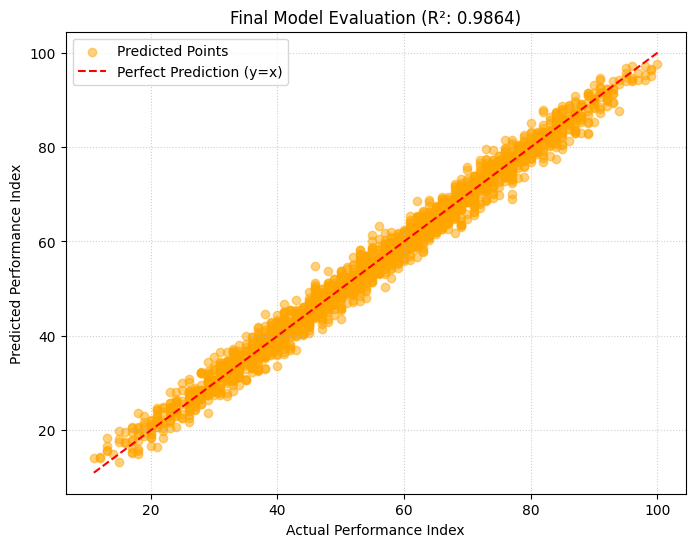

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Scatter plot of Actual vs Predicted values
plt.scatter(y_test, y_pred_multi, alpha=0.5, color='orange', label='Predicted Points')

# Draw the perfect prediction line (diagonal)
perfect_line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title(f'Final Model Evaluation (R²: {new_r2:.4f})')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()